In [58]:
#Import statements:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df=pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
118,ham,Hmm...my uncle just informed me that he's payi...,NaN,NaN,NaN
5325,ham,Gal n boy walking in d park. gal-can i hold ur...,NaN,NaN,NaN
3088,ham,What Today-sunday..sunday is holiday..so no wo...,NaN,NaN,NaN
2607,ham,:-) yeah! Lol. Luckily i didn't have a starrin...,NaN,NaN,NaN
2902,ham,Tell me pa. How is pain de.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Flow of work:
### 1. Data Cleaning
### 2. EDA
### 3. Text Preprocessing
### 4. Model Building
### 5. Evaluation
### 6. Improvement
### 7. Website
### 8. Deployment

## Data Cleaning:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last three columns:

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5248,ham,U come n search tat vid..not finishd..
3736,ham,Plz note: if anyone calling from a mobile Co. ...
1433,ham,You intrepid duo you! Have a great time and se...
2777,ham,Kind of. Took it to garage. Centre part of exh...
892,ham,Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctarg...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.sample(5)

,target,text
4264,0,&lt;DECIMAL&gt; m but its not a common car he...
448,0,LOL ... Have you made plans for new years?
5421,0,"Hi elaine, is today's meeting confirmed?"
1350,0,Bugis oso near wat...
2793,0,"The affidavit says &lt;#&gt; E Twiggs St, di..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

## EDA (Exploratory Data Analysis):

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

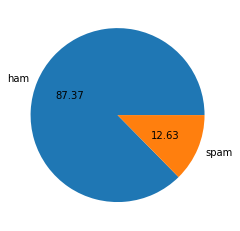

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'] ,autopct='%0.2f')
plt.show()

In [19]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

## Data Preprocessing:
### 1.Lower case
### 2.Tokenization
### 3. Removing Special Character
### 4. Removing stop words
### 5. Stemming

In [20]:
# Word Tokenization function from NTLK Library 
nltk.word_tokenize("Hye i am working")

['Hye', 'i', 'am', 'working']

In [21]:
#All set of punctuation or special character:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
#Removing Stopwords from NLTK Library 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
#Stemming funcction from NLTK Library:
ps=PorterStemmer()
ps.stem('loving')

'love'

In [24]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            if i.isalnum():
                y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [25]:
transform_text('Hye! HYHY? our? hi')

'hye hyhi hi'

In [26]:
#Implementation of transform text and appending to the new column:
df['transformed_text']=df['text'].apply(transform_text)

In [27]:
df

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [28]:
#Count the number of characters:
df['num_characters']=df['text'].apply(len)

In [29]:
#Count the number of word:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
#Count the number of sentence:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.sample(5)

,target,text,transformed_text,num_characters,num_words,num_sentences
1160,0,You sure your neighbors didnt pick it up,sure neighbor didnt pick,40,8,1
913,0,Ok lor but not too early. Me still having proj...,ok lor earli still project meet,62,14,2
688,0,Thanks love. But am i doing torch or bold.,thank love torch bold,42,11,2
4057,0,Hi di is yijue we're meeting at 7 pm at esapla...,hi di yiju meet 7 pm esaplanad tonight,59,14,1
3573,0,Yeah sure I'll leave in a min,yeah sure leav min,29,8,1


In [32]:
#Word Cloud Representation for data modulation:
wc=WordCloud(width=600,height=700,min_font_size=8,background_color='black')

In [33]:
#Wordcloud for Spam:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

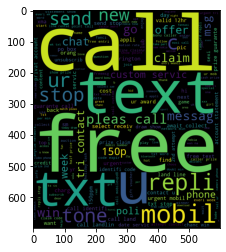

In [34]:
plt.imshow(spam_wc)

In [35]:
#Wordcloud for Ham:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

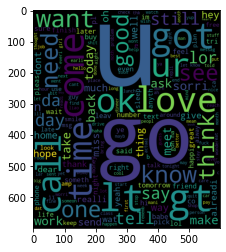

In [36]:
plt.imshow(ham_wc)

In [37]:
#Segmenting each word in spams to a list of word bag:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [38]:
#Total number of different words in the list:
len(spam_corpus)

9939

C:\Users\SRJ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


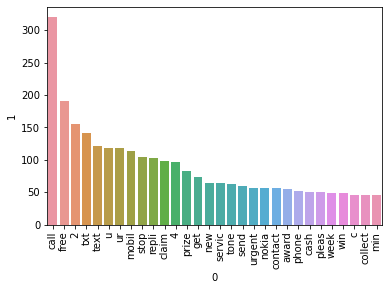

In [39]:
#Visualozing the most common spam messages:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
#Segmenting each word in Hams to a list of word bag:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [41]:
#Total number of different words in the list:
len(ham_corpus)

35402

C:\Users\SRJ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


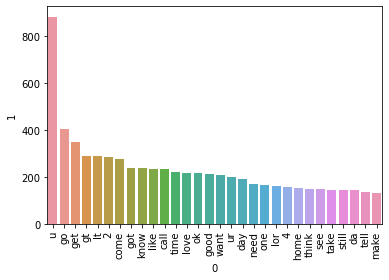

In [42]:
#Visualozing the most common ham messages:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building:

In [78]:
#Vectorizng the mdoel to get the numerical representation of the text data:
cv=CountVectorizer()

In [79]:
#Transforming text to numberical array:
#Saving it to the X formatted array-->
X=cv.fit_transform(df['transformed_text']).toarray()

In [80]:
X.shape

(5169, 6708)

In [82]:
#Saving the targetted number array in 'y':
y=df['target'].values

In [83]:
y.shape

(5169,)

In [84]:
#Train test split section:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [87]:
#Calling the library individually:
#Naive Bayes Alogorithm (best for text-targetted classifer)-->
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [88]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [89]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [90]:
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [91]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbt=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [92]:
clfs={
    'SVC':svc,
    'KNeighbors':knc,
    'GaussianNB':gnb,
    'MultinomialNB':mnb,
    'BernoulliNB':bnb,
    'DecisionTree':dtc,
    'LogisticReg':lrc,
    'RandomForest':rfc,
    'Adaboost':abc,
    'Bagging':bc,
    'Extratree':etc,
    'GradientBoost':gdbt
}

In [93]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [94]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.971953578336557, 1.0)

In [95]:
acc=[]
precision=[]
print("Classifier_Name :\t: Accuracy :\t: Precision_Score")
for name,clf in clfs.items():
    curr_acc,curr_pre=train_classifier(clf,X_train,y_train,X_test,y_test)
    acc.append(curr_acc)
    precision.append(curr_pre)
    print(str(name)+"\t"+str(curr_acc)+'\t'+str(curr_pre))

Classifier_Name :	: Accuracy :	: Precision_Score
SVC	0.9303675048355899	0.7661290322580645
KNeighbors	0.9061895551257253	1.0
GaussianNB	0.8800773694390716	0.5315315315315315
MultinomialNB	0.9642166344294004	0.8344370860927153
BernoulliNB	0.9700193423597679	0.9734513274336283
DecisionTree	0.9264990328820116	0.9428571428571428
LogisticReg	0.9709864603481625	0.9736842105263158
RandomForest	0.971953578336557	1.0
Adaboost	0.9632495164410058	0.9464285714285714
Bagging	0.9622823984526112	0.9159663865546218
Extratree	0.97678916827853	0.9913793103448276
GradientBoost	0.9439071566731141	0.9444444444444444


In [96]:
tfid=TfidfVectorizer(max_features=3000)

In [97]:
X1=tfid.fit_transform(df['transformed_text']).toarray()

In [98]:
y1=df['target'].values

In [99]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=2)

In [105]:
acc_max3000=[]
precision_max3000=[]
print("Classifier_Name :\t: Accuracy_maxfeature3000 :\t: Precision_Score_maxfeature3000")
for name,clf in clfs.items():
    curr_acc,curr_pre=train_classifier(clf,X1_train,y1_train,X1_test,y1_test)
    acc_max3000.append(curr_acc)
    precision_max3000.append(curr_pre)
    print(str(name)+"\t"+str(curr_acc)+'\t'+str(curr_pre))

Classifier_Name :	: Accuracy_maxfeature3000 :	: Precision_Score_maxfeature3000
SVC	0.9758220502901354	0.9747899159663865
KNeighbors	0.9052224371373307	1.0
GaussianNB	0.8694390715667312	0.5068493150684932
MultinomialNB	0.9709864603481625	1.0
BernoulliNB	0.9835589941972921	0.991869918699187
DecisionTree	0.9274661508704062	0.8118811881188119
LogisticReg	0.9584139264990329	0.9702970297029703
RandomForest	0.9758220502901354	0.9829059829059829
Adaboost	0.960348162475822	0.9292035398230089
Bagging	0.9584139264990329	0.8682170542635659
Extratree	0.9748549323017408	0.9745762711864406
GradientBoost	0.9468085106382979	0.9191919191919192


In [108]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc,'Precision':precision,'Accuracy_Max3000':acc_max3000,'Precision_Max3000':precision_max3000}).sort_values('Precision_Max3000',ascending=False)

In [109]:
performance_df

,Algorithm,Accuracy,Precision,Accuracy_Max3000,Precision_Max3000
1,KNeighbors,0.906190,1.000000,0.905222,1.000000
3,MultinomialNB,0.964217,0.834437,0.970986,1.000000
4,BernoulliNB,0.970019,0.973451,0.983559,0.991870
7,RandomForest,0.971954,1.000000,0.975822,0.982906
0,SVC,0.930368,0.766129,0.975822,0.974790
10,Extratree,0.976789,0.991379,0.974855,0.974576
6,LogisticReg,0.970986,0.973684,0.958414,0.970297
8,Adaboost,0.963250,0.946429,0.960348,0.929204
11,GradientBoost,0.943907,0.944444,0.946809,0.919192
9,Bagging,0.962282,0.915966,0.958414,0.868217


In [110]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))